In [2]:
using XLSX
using DataFrames, TimeSeries
using StatsPlots
using Plots
using LinearAlgebra
using CSV
using StatsBase
using GLM
using Distributions
include("../utils.jl")


print_percentiles (generic function with 2 methods)

In [3]:
columns = [:Date, :USA_Net, :World_ex_USA, :EM_Net, :ACWI_Net_PLN, :MwigTR]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes_PLN_2007"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_pln = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> percentchange(x, :log)

206×5 TimeArray{Float64, 2, Date, Matrix{Float64}} 2007-02-28 to 2024-03-31
┌────────────┬─────────────┬──────────────┬────────────┬──────────────┬─────────
│            │ USA_Net     │ World_ex_USA │ EM_Net     │ ACWI_Net_PLN │ MwigTR ⋯
├────────────┼─────────────┼──────────────┼────────────┼──────────────┼─────────
│ 2007-02-28 │  -0.0191448 │   0.00796789 │ -0.0059534 │   -0.0182953 │ -0.004 ⋯
│ 2007-03-31 │   0.0103939 │    0.0253004 │  0.0389081 │  -0.00870765 │    0.1 ⋯
│ 2007-04-30 │   0.0416944 │     0.044513 │  0.0463536 │   0.00330572 │   0.05 ⋯
│ 2007-05-31 │   0.0337678 │    0.0219444 │  0.0473989 │    0.0520552 │    0.1 ⋯
│ 2007-06-30 │  -0.0172295 │   0.00100296 │  0.0458126 │   -0.0209173 │   0.01 ⋯
│ 2007-07-31 │  -0.0317479 │   -0.0139199 │  0.0514173 │   -0.0220522 │   -0.1 ⋯
│ 2007-08-31 │   0.0144462 │   -0.0145806 │ -0.0214798 │    0.0112981 │  -0.05 ⋯
│ 2007-09-30 │    0.036804 │    0.0552583 │   0.104757 │  -0.00506195 │  -0.04 ⋯
│     ⋮      │      ⋮      │     

In [4]:
columns = [:Date, :ACWI_Net, :USA_Net, :World_ex_USA, :EM_Net, :EUROPE_Net, :PACIFIC_Net, :JAPAN_Net]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_usd = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> percentchange(x, :log)

435×7 TimeArray{Float64, 2, Date, Matrix{Float64}} 1988-01-31 to 2024-03-31
┌────────────┬─────────────┬────────────┬──────────────┬─────────────┬──────────
│            │ ACWI_Net    │ USA_Net    │ World_ex_USA │ EM_Net      │ EUROPE_ ⋯
├────────────┼─────────────┼────────────┼──────────────┼─────────────┼──────────
│ 1988-01-31 │   0.0246253 │  0.0410122 │    0.0153553 │   0.0935834 │  -0.041 ⋯
│ 1988-02-29 │   0.0560778 │  0.0401109 │    0.0640862 │   0.0031132 │   0.057 ⋯
│ 1988-03-31 │   0.0302388 │ -0.0349774 │    0.0592025 │     0.10175 │   0.027 ⋯
│ 1988-04-30 │   0.0125024 │ 0.00818061 │    0.0140195 │   0.0517417 │    0.01 ⋯
│ 1988-05-31 │  -0.0201209 │ 0.00760205 │   -0.0326806 │   0.0292525 │    -0.0 ⋯
│ 1988-06-30 │ -0.00119203 │  0.0445733 │   -0.0229028 │   0.0331365 │  -0.010 ⋯
│ 1988-07-31 │     0.01818 │ -0.0040323 │    0.0288082 │  -0.0260317 │  0.0022 ⋯
│ 1988-08-31 │  -0.0566908 │  -0.035096 │   -0.0667177 │  -0.0274362 │  -0.046 ⋯
│     ⋮      │      ⋮      │     

In [5]:
returns_summarystats(returns_pln, 12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
USA_Net,0.1613,1.4788,0.0898,0.4313,-2.257,-0.7536,-0.2102,0.0369,1.3609,0.5566,0.1765
World_ex_USA,0.1783,1.7129,0.0352,0.3954,-2.7986,-0.7734,-0.2353,0.1137,2.1922,0.1976,0.0974
EM_Net,0.215,1.893,0.0324,0.4636,-3.8371,-0.7774,-0.3298,0.136,3.3292,0.1508,0.0422
ACWI_Net_PLN,0.125,1.2714,0.0799,0.3483,-1.2476,-0.3511,-0.1629,0.0208,0.7202,0.6391,0.0941
MwigTR,0.2158,2.403,0.0499,0.4405,-3.8898,-0.9091,-0.3229,0.1997,4.4081,0.2311,0.1195


In [6]:
returns_summarystats(returns_usd,12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
ACWI_Net,0.1537,1.3949,0.0747,0.3969,-2.65,-0.7864,-0.2178,0.0428,1.9489,0.4861,0.1499
USA_Net,0.1491,1.4788,0.1,0.4254,-2.257,-0.7009,-0.2004,0.0014,1.3793,0.6706,0.1537
World_ex_USA,0.1682,1.7129,0.0543,0.4165,-2.7986,-0.6171,-0.2752,0.0571,1.6003,0.323,0.0992
EM_Net,0.2239,2.0825,0.0877,0.5565,-4.1,-0.8932,-0.3138,0.1422,3.1066,0.3914,0.1224
EUROPE_Net,0.1744,1.8854,0.074,0.4811,-2.8659,-0.6536,-0.2818,0.06,1.6572,0.4246,0.1284
PACIFIC_Net,0.2036,2.2617,0.0764,0.4803,-3.4543,-0.6725,-0.2346,0.063,2.7162,0.3754,0.1028
JAPAN_Net,0.194,2.605,0.0209,0.4756,-2.5867,-0.0927,-0.3664,0.0549,1.1029,0.1078,0.0474


In [7]:
returns_pln |> values |> cor

5×5 Matrix{Float64}:
 1.0       0.898083  0.762634  0.67237   0.749267
 0.898083  1.0       0.87554   0.512036  0.764729
 0.762634  0.87554   1.0       0.410882  0.68595
 0.67237   0.512036  0.410882  1.0       0.480157
 0.749267  0.764729  0.68595   0.480157  1.0

In [8]:
returns_usd |> values |> cor

7×7 Matrix{Float64}:
 1.0       0.912189  0.960715  0.77575   0.920939  0.808688  0.725563
 0.912189  1.0       0.776151  0.673709  0.803782  0.707141  0.500498
 0.960715  0.776151  1.0       0.733124  0.933812  0.790075  0.807135
 0.77575   0.673709  0.733124  1.0       0.69814   0.827589  0.513798
 0.920939  0.803782  0.933812  0.69814   1.0       0.76197   0.581619
 0.808688  0.707141  0.790075  0.827589  0.76197   1.0       0.528712
 0.725563  0.500498  0.807135  0.513798  0.581619  0.528712  1.0

In [9]:
# ACWI returns

μ = mean(values(returns_pln[:ACWI_Net_PLN])) .* 12
σ = std(values(returns_pln[:ACWI_Net_PLN])) .* 12^0.5

scenarios_acwi = rand(Normal(μ, σ), 100_000)

quantile(scenarios_acwi, [.1, .3, .5, .7, .9])


5-element Vector{Float64}:
 -0.08036761814108521
  0.014316026739154842
  0.07956807063754237
  0.14530023805833595
  0.24036401981953937

In [10]:
μ = vec(mean(values(returns_pln[:USA_Net, :World_ex_USA, :EM_Net]), dims=1) .* 12)
Σ = cov(values(returns_pln[:USA_Net, :World_ex_USA, :EM_Net])) .* 12
scenarios_multi = MvNormal(μ, Σ) |> x -> rand(x, 100_000)

#w = [.6, .28, .12]
w = [.5, .35, .15]
portfolio_scenarios = scenarios_multi' * w
quantile(portfolio_scenarios, [.1, .3, .5, .7, .9])

5-element Vector{Float64}:
 -0.15378238341153588
 -0.026471392753537763
  0.061293875571785415
  0.1493622019081629
  0.2761095374789671

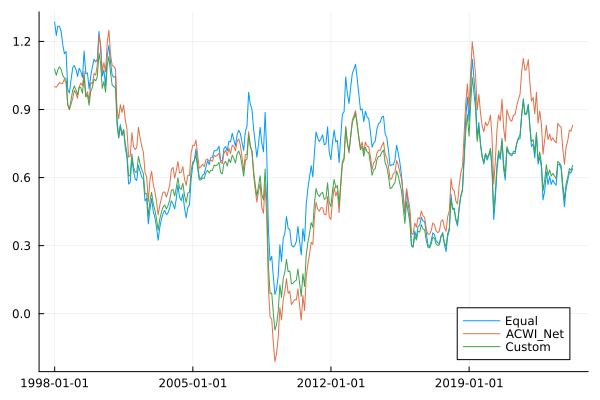

In [28]:
# test for 1/N portfolio
equal_porfolio_returns = returns_usd[:USA_Net, :World_ex_USA, :EM_Net,] |>
                         values |> x -> x * [1/3, 1/3, 1/3] |> 
                         x -> TimeArray(timestamp(returns_usd), x, [:Equal])
equal_10y = moving(sum, equal_porfolio_returns, 120)
# test for 1/N portfolio
custom_porfolio_returns = returns_usd[:USA_Net, :World_ex_USA, :EM_Net,] |>
                         values |> x -> x * [.375, .375, .15] |> 
                         x -> TimeArray(timestamp(returns_usd), x, [:Custom])
custom_10y = moving(sum, custom_porfolio_returns, 120)
acwi_10y = moving(sum, returns_usd[:ACWI_Net], 120)

plot(equal_10y)
plot!(acwi_10y)
plot!(custom_10y)

In [24]:
returns_summarystats(merge(equal_10y, acwi_10y, custom_10y) ./ 10,1)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
Equal,0.0248,0.1286,0.0685,0.0824,0.0084,0.1611,0.0498,0.9521,-0.4603,2.7599,0.069
ACWI_Net,0.0277,0.1249,0.0669,0.085,-0.021,-0.6667,0.0515,0.9702,0.5192,2.4139,0.07
Equal_1,0.0248,0.1286,0.0685,0.0824,0.0084,0.1611,0.0498,0.9521,-0.4603,2.7599,0.069
